# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

The SAT and ACT are standardised test for US university admissions. While the format of each test are different, most universities do not prefer one over the other. College Board is a mission-driven not-for-profit organization that runs the SAT test to connects students to college success and opportunity. It is important to increase participation rates of the SAT as it provides a better chance for a student to enter college.

As there are 2 standardised test, different high schools have different approaches as to which test to take, often this is decided by the state's education board. For this reason, we see some states that highly participates in the SAT and not the ACT and vice versa. 

The ACT took over as the market leader of admissions test since 2012 (Source: https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/). College Board is looking to increase the SAT participation.

In this notebook, we seek to use statistical analysis with Python to analyse how to increase the SAT's participation rates in the US. We will be using Pandas for data importing, cleaning and analysis. Matplotlib, Seaborn and Tableau for data visualisation.

## Problem Statement

Which states in the US should College Board target to increase the national participation rate of the SAT?



### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_17 = pd.read_csv('../data/sat_2017.csv')
act_17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Rather than print, I am using jupyter to return me the result as it is presented nicely
sat_17.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

In [4]:
act_17.head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:
I will be exploring each column in the 2 data set. The datasets contains average scores and participation for the states in the United States.

##### SAT DATASET
50 rows of data, 1 for each state in the US.

State: Name of the state - Object - 51 non-null

Participation: % of students who participated in the SAT

Evidence-Based Reading and Writing: Average score of test

Math: Average score of test

Total: Average score of test

##### ACT DATASET
51 rows of data, 1 for each state in the US and 1 row labelled National (assume to be the aggregated row across all states).

State: Name of the state

Participation: % of students who participated in the SAT

English: Average score of test

Math: Average score of test

Reading: Average score of test

Science: Average score of test

Composite: Average score of average scores

#### 4a. Does the data look complete? 

Answer:
The data looks complete. We can verify this by using the .info() method on the dataframes to check for null fields

In [5]:
sat_17.info()
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null   

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [6]:
act_17.describe().T

count       mean       std   min     25%    50%     75%   max
English   52.0  20.919231  2.332132  16.3  19.000  20.55  23.300  25.5
Math      52.0  21.173077  1.963602  18.0  19.400  20.90  23.100  25.3
Reading   52.0  22.001923  2.048672  18.1  20.475  21.70  24.125  26.0
Science   52.0  21.040385  3.151113   2.3  19.900  21.15  22.525  24.9

In [7]:
sat_17.describe().T

count         mean        std    min  \
Evidence-Based Reading and Writing   51.0   569.117647  45.666901  482.0   
Math                                 51.0   547.627451  84.909119   52.0   
Total                                51.0  1126.098039  92.494812  950.0   

                                       25%     50%     75%     max  
Evidence-Based Reading and Writing   533.5   559.0   613.0   644.0  
Math                                 522.0   548.0   599.0   651.0  
Total                               1055.5  1107.0  1212.0  1295.0

Answer:
1) Score
The max score for SAT is 800 and the lowest score is 200 for each test. On the other hand, the ACT has a max score of 36 and the lowest is 1.

2 interesting observations from the describe method is that there is a state with an average math score of 52 for SAT 2017. This should not be possible as the lowest possible score for an individual is 200.

The other observation is that there is a state with an average ACT science score of 2.3. While it is possible, it is highly unlikely that a state can mess up an exam so badly, unless there is some natural disater that occured during the exam.

We will investigate the issues mentioned above.


2) Different Test

The SATs only test for Evidence-Based Reading and Writing, and Math. The ACTs test for English, Math, Reading and Science

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [8]:
# SAT outlier
sat_17[sat_17["Math"] < 200]
# We see that Maryland's Math score is 52. We get the real Math score by subtracting 536 from 1060:
sat_17.loc[(sat_17["State"] == 'Maryland'),["Math"]] = 1060 - 536


The actual average math score is 524, this is also shown in this SAT annual report for Maryland https://reports.collegeboard.org/pdf/2017-maryland-sat-suite-assessments-annual-report.pdf

In [9]:
# ACT outlier


In [10]:
act_17

State Participation  English  Math  Reading  Science  \
0               National           60%     20.3  20.7     21.4     21.0   
1                Alabama          100%     18.9  18.4     19.7     19.4   
2                 Alaska           65%     18.7  19.8     20.4     19.9   
3                Arizona           62%     18.6  19.8     20.1     19.8   
4               Arkansas          100%     18.9  19.0     19.7     19.5   
5             California           31%     22.5  22.7     23.1     22.2   
6               Colorado          100%     20.1  20.3     21.2     20.9   
7            Connecticut           31%     25.5  24.6     25.6     24.6   
8               Delaware           18%     24.1  23.4     24.8     23.6   
9   District of Columbia           32%     24.4  23.5     24.9     23.5   
10               Florida           73%     19.0  19.4     21.0     19.4   
11               Georgia           55%     21.0  20.9     22.0     21.3   
12                Hawaii           90%     17.8  19.2     19.2     19.3   
13                 Idaho           38%     21.9  21.8     23.0     22.1   
14              Illinois           93%     21.0  21.2     21.6     21.3   
15               Indiana           35%     22.0  22.4     23.2     22.3   
16                  Iowa           67%     21.2  21.3     22.6     22.1   
17                Kansas           73%     21.1  21.3     22.3     21.7   
18              Kentucky          100%     19.6  19.4     20.5     20.1   
19             Louisiana          100%     19.4  18.8     19.8     19.6   
20                 Maine            8%     24.2  24.0     24.8     23.7   
21              Maryland           28%     23.3  23.1     24.2      2.3   
22         Massachusetts           29%     25.4  25.3     25.9     24.7   
23              Michigan           29%     24.1  23.7     24.5     23.8   
24             Minnesota          100%     20.4  21.5     21.8     21.6   
25           Mississippi          100%     18.2  18.1     18.8     18.8   
26              Missouri          100%     19.8  19.9     20.8     20.5   
27               Montana          100%     19.0  20.2     21.0     20.5   
28              Nebraska           84%     20.9  20.9     21.9     21.5   
29                Nevada          100%     16.3  18.0     18.1     18.2   
30         New Hampshire           18%     25.4  25.1     26.0     24.9   
31            New Jersey           34%     23.8  23.8     24.1     23.2   
32            New Mexico           66%     18.6  19.4     20.4     20.0   
33              New York           31%     23.8  24.0     24.6     23.9   
34        North Carolina          100%     17.8  19.3     19.6     19.3   
35          North Dakota           98%     19.0  20.4     20.5     20.6   
36                  Ohio           75%     21.2  21.6     22.5     22.0   
37              Oklahoma          100%     18.5  18.8     20.1     19.6   
38                Oregon           40%     21.2  21.5     22.4     21.7   
39          Pennsylvania           23%     23.4  23.4     24.2     23.3   
40          Rhode Island           21%     24.0  23.3     24.7     23.4   
41        South Carolina          100%     17.5  18.6     19.1     18.9   
42          South Dakota           80%     20.7  21.5     22.3     22.0   
43             Tennessee          100%     19.5  19.2     20.1     19.9   
44                 Texas           45%     19.5  20.7     21.1     20.9   
45                  Utah          100%     19.5  19.9     20.8     20.6   
46               Vermont           29%     23.3  23.1     24.4     23.2   
47              Virginia           29%     23.5  23.3     24.6     23.5   
48            Washington           29%     20.9  21.9     22.1     22.0   
49         West Virginia           69%     20.0  19.4     21.2     20.5   
50             Wisconsin          100%     19.7  20.4     20.6     20.9   
51               Wyoming          100%     19.4  19.8     20.8     20.6   

   Composite  
0       21.0  
1       19.2 

In [11]:
# ACT outlier
act_17[act_17["Science"] < 18]


State Participation  English  Math  Reading  Science Composite
21  Maryland           28%     23.3  23.1     24.2      2.3      23.6

Maryland ACT science score is the outlier, we are not able to reverse engineer the composite score. This is because the composite score for an individual is the rounded average of their 4 tests. Since rounding is involved, we will get some rounding error. From the composite score we can estimate that Maryland's actual average Science score is:
23.6 * 4 - 23.3 - 23.1 - 24.2 = 23.8 (estimate)

Checking online, we found https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

The average science score for Maryland is 23.2.

In [12]:
#Reassign wrong data
act_17.loc[act_17["State"] == "Maryland",["Science"]] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
#code
sat_17.info()
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null   

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
Participation in ACT and SAT is an object when it can be better represented as a float.

The ACT data set "Composite" column is an object when it should be a float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:
#code
def covert_column(dataframe,col):
    dataframe[col] = dataframe[col].str.replace('%',"").map(lambda x: float(x)/100)
    return dataframe[col]
covert_column(act_17,'Participation');
covert_column(sat_17,'Participation');


- Fix any individual values preventing other columns from being the appropriate type.

In [15]:
#code
#investigate what is the issue
act_17['Composite'].tail()

47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object

In [16]:
# This is causing the issue

act_17.loc[[51],['Composite']] = 20.2

act_17['Composite'] = act_17['Composite'].map(lambda x: float(x))

In [17]:
#check
act_17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [18]:
#Code:
sat_17.info()
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading   

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [19]:
#code
act_17.rename(columns = {
                        'State':'act17_state',
                        'Participation':'act17_part_rate',
                        'English':'act17_eng_score',
                        'Math':'act17_math_score',         
                        'Reading':'act17_read_score',      
                        'Science':'act17_sci_score',      
                        'Composite':'act17_comp_score'
                        }, inplace = True)

sat_17.rename(columns = {
                        'State':'sat17_state',
                        'Participation':'sat17_part_rate',
                        'Evidence-Based Reading and Writing':'sat17_read_score',
                        'Math':'sat17_math_score',
                        'Total':'sat17_total_score'
                        }, inplace = True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|sat_17_state|object|SAT|The name of the state| 
|sat_17_part_rate|float|SAT|The participation rate of the state (%)| 
|sat_17_read_score|integer|SAT|The average score of the 'Evidence-Based Reading and Writing' test in the SAT of the state (max score 800)| 
|sat_17_math_score|integer|SAT|The average score of the 'Math' test in the SAT of the state (max score 800)| 
|sat_17_total_score|integer|SAT|The average total score of the 2 SAT tests combined of the state (max score 1600)| 
|act_17_state|object|ACT|The name of the state| 
|act_17_part_rate|object|ACT|The participation rate of the state (%)| 
|act17_eng_score|float|ACT|The average score of the 'English' test in the ACT of the state (max score 36)|
|act17_math_score|float|ACT|The average score of the 'Math' test in the ACT of the state (max score 36)|
|act17_read_score|float|ACT|The average score of the 'Reading' test in the ACT of the state (max score 36)|
|act17_sci_score|float|ACT|The average score of the 'Science' test in the ACT of the state (max score 36)|
|act17_comp_score|float|ACT|The average score of the average of the four test scores in the ACT of the state (max score 36)|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [20]:
#code
act_17.drop(labels = 0, axis = 0,inplace = True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
#Code:
#rename states
act_17.rename(columns = {'act17_state':'state'},inplace = True)
sat_17.rename(columns = {'sat17_state':'state'},inplace = True)

In [22]:
sat_17.shape

(51, 5)

In [23]:
act_17.shape

(51, 7)

In [24]:
combined_2017 = pd.merge(act_17,sat_17,on = 'state', how = 'left')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [25]:
#code
combined_2017.to_csv('..\data\combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [26]:
#read the csv
sat_18 = pd.read_csv("../data/sat_2018.csv")
act_18 = pd.read_csv("../data/act_2018_updated.csv")

In [27]:
#describe
sat_18.head()
# SAT 2018 data looks similar to 2017 raw data

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076

In [28]:
act_18.head()
# ACT 2018 has the same columns as before, with different names 
# and diff format for "Percentage of Students Tested" this will be addressed later

State  Percentage of Students Tested  Average Composite Score  \
0     Alabama                            100                     19.1   
1      Alaska                             33                     20.8   
2     Arizona                             66                     19.2   
3    Arkansas                            100                     19.4   
4  California                             27                     22.7   

   Average English Score  Average Math Score  Average Reading Score  \
0                   18.9                18.3                   19.6   
1                   19.8                20.6                   21.6   
2                   18.2                19.4                   19.5   
3                   19.1                18.9                   19.7   
4                   22.5                22.5                   23.0   

   Average Science Score  
0                   19.0  
1                   20.7  
2                   19.2  
3                   19.4  
4                   22.1

In [29]:
sat_18.info()
# Participation Dtype is object. I will change the representation of the %.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [30]:
act_18.info()
# Percentage of Students Tested is an integer. I will change the representation i.e. 33 --> 0.33

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [31]:
#check for null
print(act_18.isnull().sum())
print(sat_18.isnull().sum())
# no null fields

State                            0
Percentage of Students Tested    0
Average Composite Score          0
Average English Score            0
Average Math Score               0
Average Reading Score            0
Average Science Score            0
dtype: int64
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64


In [32]:
#Clean corrupted columns
# to address sat_18['Participation'] format
sat_18['Participation'] = sat_18['Participation'].str.replace("%","").map(lambda x: float(x)/100)

In [33]:
# to address act_18['Percentage of Students Tested'] format
act_18['Percentage of Students Tested'] = act_18['Percentage of Students Tested'].map(lambda x: float(x)/100)

In [34]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [35]:
#Rename columns
act_18.rename(columns = {
                        'State':'state',
                        'Percentage of Students Tested':'act18_part_rate',
                        'Average English Score':'act18_eng_score',
                        'Average Math Score':'act18_math_score',         
                        'Average Reading Score':'act18_read_score',      
                        'Average Science Score':'act18_sci_score',      
                        'Average Composite Score':'act18_comp_score'
                        }, inplace = True)

sat_18.rename(columns = {
                        'State':'state',
                        'Participation':'sat18_part_rate',
                        'Evidence-Based Reading and Writing':'sat18_read_score',
                        'Math':'sat18_math_score',
                        'Total':'sat18_total_score'
                        }, inplace = True)


In [36]:
# Similar to 2017, I will index the datasets on the State as 
# it is an unique identifier of each column and they match across the data sets
# Merge 2018 data
combined_2018 = pd.merge(act_18,sat_18,on = 'state', how = 'left')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [37]:
#Merge 2017 with 2018 data
final = pd.merge(combined_2017, combined_2018, on = 'state', how = 'left')

In [38]:
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [39]:
#Code:
final.describe().T

count         mean        std     min       25%      50%  \
act17_part_rate     51.0     0.652549   0.321408    0.08     0.310     0.69   
act17_eng_score     51.0    20.931373   2.353677   16.30    19.000    20.70   
act17_math_score    51.0    21.182353   1.981989   18.00    19.400    20.90   
act17_read_score    51.0    22.013725   2.067271   18.10    20.450    21.80   
act17_sci_score     51.0    21.450980   1.739353   18.20    19.950    21.30   
act17_comp_score    51.0    21.519608   2.020695   17.80    19.800    21.40   
sat17_part_rate     51.0     0.398039   0.352766    0.02     0.040     0.38   
sat17_read_score    51.0   569.117647  45.666901  482.00   533.500   559.00   
sat17_math_score    51.0   556.882353  47.121395  468.00   523.500   548.00   
sat17_total_score   51.0  1126.098039  92.494812  950.00  1055.500  1107.00   
act18_part_rate     51.0     0.616471   0.340810    0.07     0.285     0.66   
act18_comp_score    51.0    21.486275   2.106278   17.70    19.950    21.30   
act18_eng_score     51.0    20.988235   2.446356   16.60    19.100    20.20   
act18_math_score    51.0    21.125490   2.035765   17.80    19.400    20.70   
act18_read_score    51.0    22.015686   2.167245   18.00    20.450    21.60   
act18_sci_score     51.0    21.345098   1.870114   17.90    19.850    21.10   
sat18_part_rate     51.0     0.457451   0.373143    0.02     0.045     0.52   
sat18_read_score    51.0   563.686275  47.502627  480.00   534.500   552.00   
sat18_math_score    51.0   556.235294  47.772623  480.00   522.500   544.00   
sat18_total_score   51.0  1120.019608  94.155083  977.00  1057.500  1098.00   

                        75%     max  
act17_part_rate       1.000     1.0  
act17_eng_score      23.300    25.5  
act17_math_score     23.100    25.3  
act17_read_score     24.150    26.0  
act17_sci_score      23.200    24.9  
act17_comp_score     23.600    25.5  
sat17_part_rate       0.660     1.0  
sat17_read_score    613.000   644.0  
sat17_math_score    599.000   651.0  
sat17_total_score  1212.000  1295.0  
act18_part_rate       1.000     1.0  
act18_comp_score     23.550    25.6  
act18_eng_score      23.700    26.0  
act18_math_score     23.150    25.2  
act18_read_score     24.100    26.1  
act18_sci_score      23.050    24.9  
sat18_part_rate       0.775     1.0  
sat18_read_score    610.500   643.0  
sat18_math_score    593.500   655.0  
sat18_total_score  1204.000  1298.0

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [40]:
final['sat18_total_score'].count()

51

In [41]:
#code
def std(col):
    mean = col.mean()
    n = col.count()
    sumterm = 0
    for i in col:
        sumterm += (i - mean)**2
    std = ((1/n)*sumterm)**(1/2)
    return std


In [42]:
std(final['sat18_total_score'])

93.22742384464433

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [43]:
#Code:
sd = {i:std(final[i]) for i in final.columns[1:]}
sd

{'act17_part_rate': 0.3182417575123181,
 'act17_eng_score': 2.3304876369363363,
 'act17_math_score': 1.9624620273436781,
 'act17_read_score': 2.0469029314842646,
 'act17_sci_score': 1.7222161451443676,
 'act17_comp_score': 2.000786081581989,
 'sat17_part_rate': 0.3492907076664507,
 'sat17_read_score': 45.21697020437866,
 'sat17_math_score': 46.65713364485503,
 'sat17_total_score': 91.58351056778743,
 'act18_part_rate': 0.33745194881997503,
 'act18_comp_score': 2.0855261815801147,
 'act18_eng_score': 2.4222536143202795,
 'act18_math_score': 2.015707255555717,
 'act18_read_score': 2.145891884510421,
 'act18_sci_score': 1.8516885484833543,
 'sat18_part_rate': 0.3694661922353942,
 'sat18_read_score': 47.03460978357609,
 'sat18_math_score': 47.30194550378352,
 'sat18_total_score': 93.22742384464433}

In [44]:
final.describe().T['std']

act17_part_rate       0.321408
act17_eng_score       2.353677
act17_math_score      1.981989
act17_read_score      2.067271
act17_sci_score       1.739353
act17_comp_score      2.020695
sat17_part_rate       0.352766
sat17_read_score     45.666901
sat17_math_score     47.121395
sat17_total_score    92.494812
act18_part_rate       0.340810
act18_comp_score      2.106278
act18_eng_score       2.446356
act18_math_score      2.035765
act18_read_score      2.167245
act18_sci_score       1.870114
sat18_part_rate       0.373143
sat18_read_score     47.502627
sat18_math_score     47.772623
sat18_total_score    94.155083
Name: std, dtype: float64

In [45]:
np.std(final)

act17_part_rate       0.318242
act17_eng_score       2.330488
act17_math_score      1.962462
act17_read_score      2.046903
act17_sci_score       1.722216
act17_comp_score      2.000786
sat17_part_rate       0.349291
sat17_read_score     45.216970
sat17_math_score     46.657134
sat17_total_score    91.583511
act18_part_rate       0.337452
act18_comp_score      2.085526
act18_eng_score       2.422254
act18_math_score      2.015707
act18_read_score      2.145892
act18_sci_score       1.851689
sat18_part_rate       0.369466
sat18_read_score     47.034610
sat18_math_score     47.301946
sat18_total_score    93.227424
dtype: float64

In [46]:
final.describe()

act17_part_rate  act17_eng_score  act17_math_score  act17_read_score  \
count        51.000000        51.000000         51.000000         51.000000   
mean          0.652549        20.931373         21.182353         22.013725   
std           0.321408         2.353677          1.981989          2.067271   
min           0.080000        16.300000         18.000000         18.100000   
25%           0.310000        19.000000         19.400000         20.450000   
50%           0.690000        20.700000         20.900000         21.800000   
75%           1.000000        23.300000         23.100000         24.150000   
max           1.000000        25.500000         25.300000         26.000000   

       act17_sci_score  act17_comp_score  sat17_part_rate  sat17_read_score  \
count        51.000000         51.000000        51.000000         51.000000   
mean         21.450980         21.519608         0.398039        569.117647   
std           1.739353          2.020695         0.352766         45.666901   
min          18.200000         17.800000         0.020000        482.000000   
25%          19.950000         19.800000         0.040000        533.500000   
50%          21.300000         21.400000         0.380000        559.000000   
75%          23.200000         23.600000         0.660000        613.000000   
max          24.900000         25.500000         1.000000        644.000000   

       sat17_math_score  sat17_total_score  act18_part_rate  act18_comp_score  \
count         51.000000          51.000000        51.000000         51.000000   
mean         556.882353        1126.098039         0.616471         21.486275   
std           47.121395          92.494812         0.340810          2.106278   
min          468.000000         950.000000         0.070000         17.700000   
25%          523.500000        1055.500000         0.285000         19.950000   
50%          548.000000        1107.000000         0.660000         21.300000   
75%          599.000000        1212.000000         1.000000         23.550000   
max          651.000000        1295.000000         1.000000         25.600000   

       act18_eng_score  act18_math_score  act18_read_score  act18_sci_score  \
count        51.000000         51.000000         51.000000        51.000000   
mean         20.988235         21.125490         22.015686        21.345098   
std           2.446356          2.035765          2.167245         1.870114   
min          16.600000         17.800000         18.000000        17.900000   
25%          19.100000         19.400000         20.450000        19.850000   
50%          20.200000         20.700000         21.600000        21.100000   
75%          23.700000         23.150000         24.100000        23.050000   
max          26.000000         25.200000         26.100000        24.900000   

       sat18_part_rate  sat18_read_score  sat18_math_score  sat18_total_score  
count        51.000000         51.000000         51.000000          51.000000  
mean          0.457451        563.686275        556.235294        1120.019608  
std           0.373143         47.502627         47.772623          94.155083  
min           0.020000        480.000000        480.000000         977.000000  
25%           0.045000        534.500000        522.500000        1057.500000  
50%           0.520000        552.000000        544.000000        1098.000000  
75%           0.775000        610.500000        593.500000        1204.000000  
max           1.000000        643.000000        655.000000        1298.000000

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:
No, pandas standard deviations are calculated with 1 degrees of freedom (ddof) as the default. The formula provided and numpy's std method provided the same answer. This is because the formula is for the population standard deviation with 0 ddof and numpy's std method default ddof = 0.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [47]:
def highest_lowest(df,column):
    high = df[column].max()
    low = df[column].min()
    state = 'state'
    return f'These {len((df[df[column] == high][state]))} state(s) have the highest participation rate ({high}) - {list(df[df[column] == high][state])} \nThese {len((df[df[column] == low][state]))} state(s) have the lowest participation rate ({low}) - {list(df[df[column] == low][state])}'

In [48]:
print(highest_lowest(final,'sat17_part_rate'))

These 4 state(s) have the highest participation rate (1.0) - ['Connecticut', 'Delaware', 'District of Columbia', 'Michigan'] 
These 3 state(s) have the lowest participation rate (0.02) - ['Iowa', 'Mississippi', 'North Dakota']


In [49]:
print(highest_lowest(final,'sat18_part_rate'))

These 5 state(s) have the highest participation rate (1.0) - ['Colorado', 'Connecticut', 'Delaware', 'Idaho', 'Michigan'] 
These 1 state(s) have the lowest participation rate (0.02) - ['North Dakota']


Notable mentions, Connecticut, Michigan, Delaware have 100% participation rate for 2017 and 2018

In [50]:
print(highest_lowest(final,'act17_part_rate'))

These 17 state(s) have the highest participation rate (1.0) - ['Alabama', 'Arkansas', 'Colorado', 'Kentucky', 'Louisiana', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming'] 
These 1 state(s) have the lowest participation rate (0.08) - ['Maine']


In [51]:
print(highest_lowest(final,'act18_part_rate'))

These 17 state(s) have the highest participation rate (1.0) - ['Alabama', 'Arkansas', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'North Carolina', 'Ohio', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming'] 
These 1 state(s) have the lowest participation rate (0.07) - ['Maine']


More states have 100% participation for ACT than SAT

- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [52]:
def highest_lowest_2(df,column):
    high = df[column].max()
    low = df[column].min()
    state = 'state'
    return f'These state(s) have the highest average composite/total score ({high}) - {list(df[df[column] == high][state])} \nThese state(s) have the lowest average composite/total score({low}) - {list(df[df[column] == low][state])}'

In [53]:
print(highest_lowest_2(final,'sat17_total_score'))

These state(s) have the highest average composite/total score (1295) - ['Minnesota'] 
These state(s) have the lowest average composite/total score(950) - ['District of Columbia']


Despite having the highest participation rate in the SAT, District of Columbia has the lowest average score among all states. We will investigate this relationship later.

In [54]:
print(highest_lowest_2(final,'sat18_total_score'))

These state(s) have the highest average composite/total score (1298) - ['Minnesota'] 
These state(s) have the lowest average composite/total score(977) - ['District of Columbia']


highest and lowest average score state for SATs remain the same for both years

In [55]:
print(highest_lowest_2(final,'act17_comp_score'))

These state(s) have the highest average composite/total score (25.5) - ['New Hampshire'] 
These state(s) have the lowest average composite/total score(17.8) - ['Nevada']


In [56]:
print(highest_lowest_2(final,'act18_comp_score'))

These state(s) have the highest average composite/total score (25.6) - ['Connecticut'] 
These state(s) have the lowest average composite/total score(17.7) - ['Nevada']


Connecticut took over as highest average composite score state in 2018. Nevada remain the lowest score for both year. Nevada has 100% participation rate in the ACT, and has the lowest composite score.

- Do any states with 100% participation on a given test have a rate change year-to-year?

In [57]:
#SAT
final.loc[(((final['sat17_part_rate'] == 1) & (final['sat18_part_rate'] != 1) | (final['sat17_part_rate'] != 1) & (final['sat18_part_rate'] == 1))),['state','sat17_part_rate','sat18_part_rate']]

state  sat17_part_rate  sat18_part_rate
5               Colorado             0.11             1.00
8   District of Columbia             1.00             0.92
12                 Idaho             0.93             1.00

District of Columbia's participation rate was 100% in 2017 but in 2018 the participation rate dropped to 92%. Colorado, had a massive increase in participation rate from 11% to 100%. 

In [58]:
#ACT
final.loc[(((final['act17_part_rate'] == 1) & (final['act18_part_rate'] != 1) | (final['act17_part_rate'] != 1) & (final['act18_part_rate'] == 1))),['state','act17_part_rate','act18_part_rate']]

state  act17_part_rate  act18_part_rate
5    Colorado             1.00             0.30
23  Minnesota             1.00             0.99
27   Nebraska             0.84             1.00
35       Ohio             0.75             1.00

Colorado saw a huge decrease in participation rate for ACT in 2018. From 100% in 2017 to 30% in 2018

- Do any states show have >50% participation on *both* tests either year?

In [59]:
#2017
final.loc[((final['act17_part_rate'] > 0.5) & (final['sat17_part_rate'] > 0.5)),['state','act17_part_rate', 'sat17_part_rate']]

state  act17_part_rate  sat17_part_rate
9   Florida             0.73             0.83
10  Georgia             0.55             0.61
11   Hawaii             0.90             0.55

In [60]:
#2018
final.loc[((final['act18_part_rate'] > 0.5) & (final['sat18_part_rate'] > 0.5)),['state','act18_part_rate', 'sat18_part_rate']]

state  act18_part_rate  sat18_part_rate
9          Florida             0.66             0.56
10         Georgia             0.53             0.70
11          Hawaii             0.89             0.56
33  North Carolina             1.00             0.52
40  South Carolina             1.00             0.55

Florida, Georgia, Hawaii, North Carolina, South Carolina had more than 50% participation in both exams in 2018

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

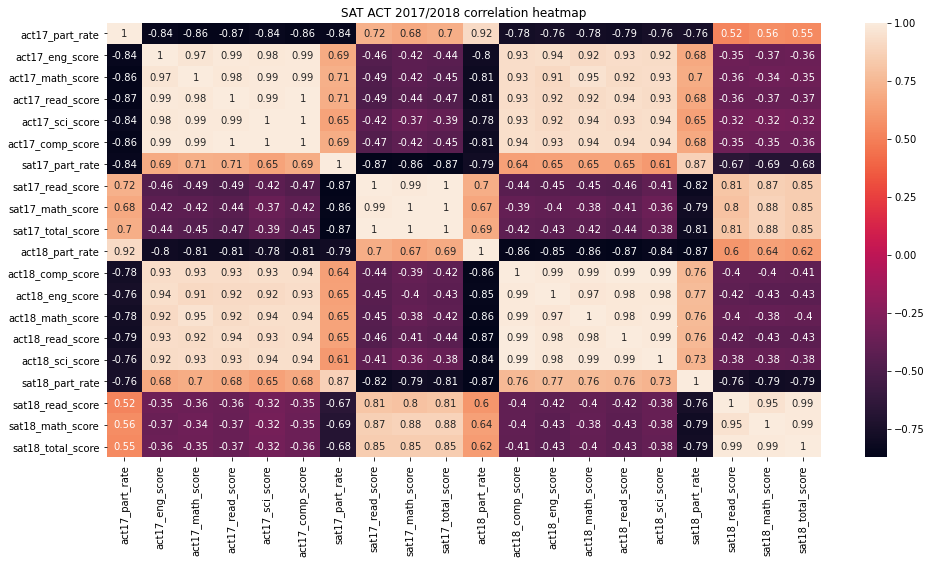

In [61]:
plt.figure(figsize = (16,8))
plt.title('SAT ACT 2017/2018 correlation heatmap')

sns.heatmap(final.corr(), annot= True);

To refocus the analysis back to participation rates of the SAT. We look at the correlation of SAT participation rates with the other variables

SAT participation rate is negatively correlated with ACT participation rate. This is expected, as local education boards will typically choose 1 of the college admissions exams to prioritise over the other. So if the SAT participation rate is high in a state, the ACT participation will likely be lower.

SAT participation rate is postively correlated with ACT scores. This in combination with the negative relationship with ACT participation tells a story. States with high SAT participation on average will have lower ACT participation rates, the students sitting for ACT will likely be doing it to improve their college admission chances/ are likely more hardworking. The opposite is true, where a high ACT participation (due to mandatory graduation conditions) may imply that there are students who are forced to take the exams when they are unprepared. So SAT participation rates will be positively correlated with ACT scores.

SAT participation rate is negatively correlated with SAT scores. This follows the argument above, where there is a difference in the population of students when the participation rate is high. The population of students who take an examination when it is optional has a selection bias and are not representative of the entire student population of the state in general.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [62]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16,16)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])   # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].axvline(np.mean(dataframe[column]), linestyle = "-.", color = "Red")

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

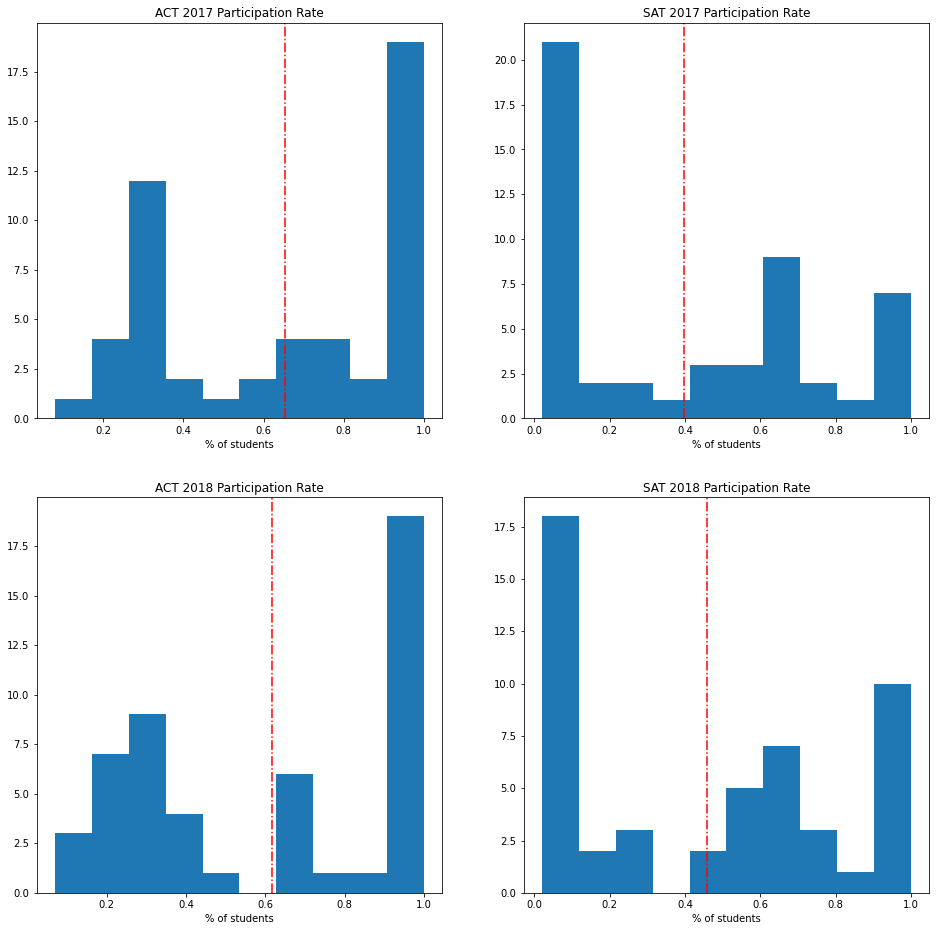

In [63]:
# Code
# Participation rates for SAT & ACT

list_of_columns = ['act17_part_rate', 'sat17_part_rate', 'act18_part_rate', 'sat18_part_rate']
list_of_titles = ['ACT 2017 Participation Rate', 'SAT 2017 Participation Rate', 'ACT 2018 Participation Rate', 'SAT 2018 Participation Rate']
list_of_xlabels = ['% of students' for _ in range(len(list_of_columns))]


subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels);

In [64]:
final[list_of_columns].mean()

act17_part_rate    0.652549
sat17_part_rate    0.398039
act18_part_rate    0.616471
sat18_part_rate    0.457451
dtype: float64


1) Bimodal distribution

We observe that participation rates are typically bimodally distributed clustered at 100% or some low percentage (0-20%). This means that for a given state, the participation rate is either very high or very low. Intuitively, it hints that there are state trends in participation rates. For example a particular state's education board may have in place policies that mandates schools to take a certain exam.


2) Changing participation rate from 2017 to 2018

In 2018, the average of the average participation rate for ACT has decreased. The opposite is true for SATS. We will take this with a pinch of salt as the average average participation rate puts equal weightage on all states regardless of population

3) 100% participation in ACT

We observe more states fully participating in ACT than SAT. This applies for both year.

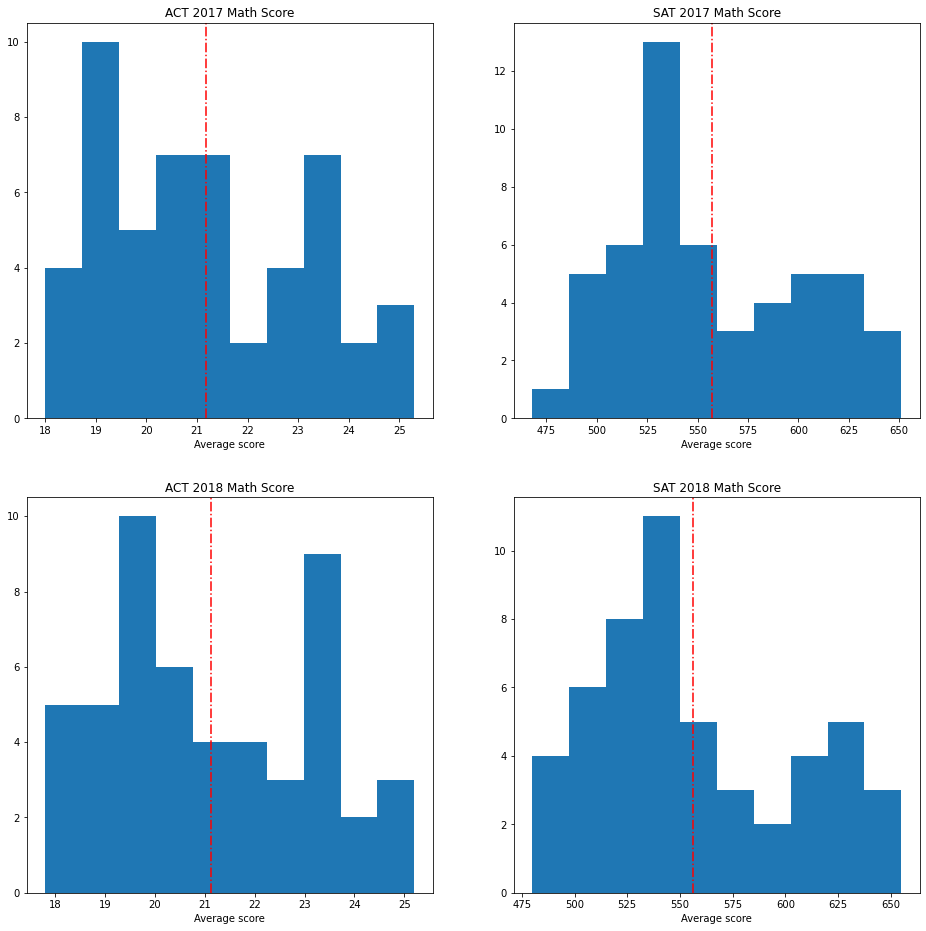

In [65]:
# Math scores for SAT & ACT
list_of_columns = ['act17_math_score', 'sat17_math_score', 'act18_math_score', 'sat18_math_score']
list_of_titles = ['ACT 2017 Math Score', 'SAT 2017 Math Score', 'ACT 2018 Math Score', 'SAT 2018 Math Score']
list_of_xlabels = ['Average score' for _ in range(len(list_of_columns))]


subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels);

In [66]:
final[list_of_columns].mean()

act17_math_score     21.182353
sat17_math_score    556.882353
act18_math_score     21.125490
sat18_math_score    556.235294
dtype: float64

1) The mean average score for both years for SAT and ACT remained roughly the same

2) Some bimodal qualities. Although not entirely, the distribution resembles a bimodal distribution. We observe some states doing very well in the exams, while other lag significantly behind.

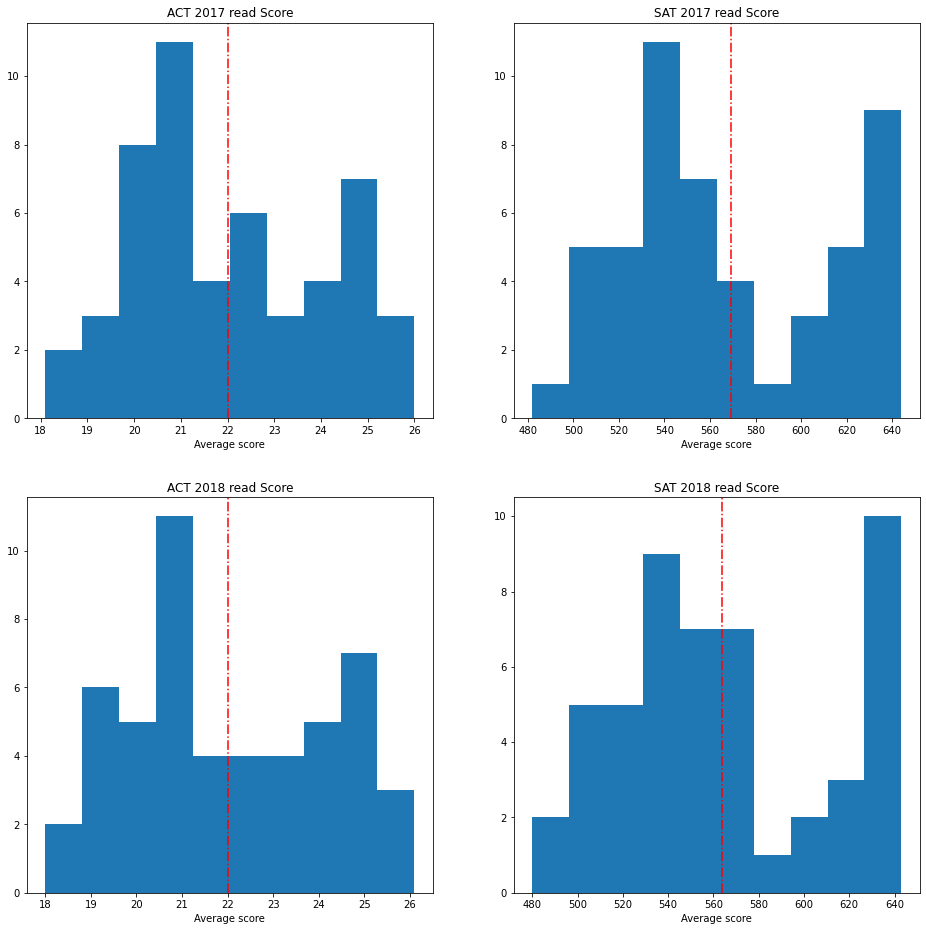

In [67]:
# Reading/verbal scores for SAT & ACT
list_of_columns = ['act17_read_score', 'sat17_read_score', 'act18_read_score', 'sat18_read_score']
list_of_titles = ['ACT 2017 read Score', 'SAT 2017 read Score', 'ACT 2018 read Score', 'SAT 2018 read Score']
list_of_xlabels = ['Average score' for _ in range(len(list_of_columns))]


subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels);

In [68]:
final[list_of_columns].mean()

act17_read_score     22.013725
sat17_read_score    569.117647
act18_read_score     22.015686
sat18_read_score    563.686275
dtype: float64

1) The mean average score for both years for SAT and ACT remained roughly the same

2) Some bimodal qualities. Although not entirely, the distribution resembles a bimodal distribution. We observe some states doing very well in the exams, while other lag significantly behind.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [69]:
def plot_scatter(dataframe,var1,var2):
    #Aesthetics
    plt.figure(figsize = (10,5))
    plt.title(f'{var1} vs {var2} scatterplot')
    plt.xlabel(var1)
    plt.ylabel(var2)
    
    #Plot scatterplot
    
    plt.scatter(dataframe[var1],dataframe[var2], alpha = 0.5, marker='x')
    
    #Plot mean line
    
    plt.plot([final[var1].mean() for _ in range(len(final[var2]))],
             final[var2].sort_values(), label = f'{var1} mean',  linestyle='--', color = "red")
    
    plt.plot(final[var1].sort_values(), 
             [final[var2].mean() for _ in range(len(final[var1]))], label = f'{var2} mean',  linestyle='--', color = "green")
    
    plt.legend(loc = 'upper left')

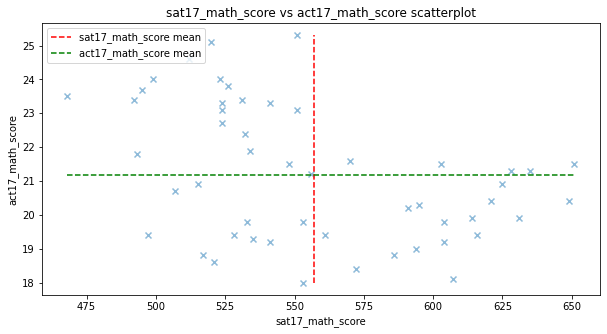

In [70]:
plot_scatter(final,'sat17_math_score', 'act17_math_score')

Observations:
The purpose of a test is to measure an individual's ability in a given subject. What is interesting is that we observe a negative correlation between the 2 test results. One would assume if a state was above average in math, it should do well in both SAT and ACT math tests.

This may hint that a different group in the state is taking the exam. For example, if "good" schools are taking the SATs and less "good" schools are opting for ACT, we would see this kind of negative correlation.

A way to control this is to look at states with high participation in both exams. This way we are able to control the group effect hypothesised. Unfortunately, there are little to no states in this sample that have very high participation rate in both exams.


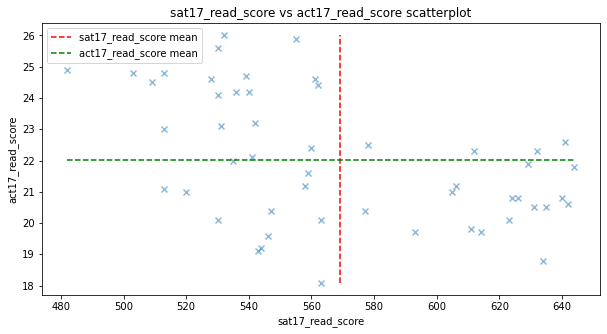

In [71]:
plot_scatter(final,'sat17_read_score', 'act17_read_score')

The verbal/reading scores exhibit the same behaviour as above

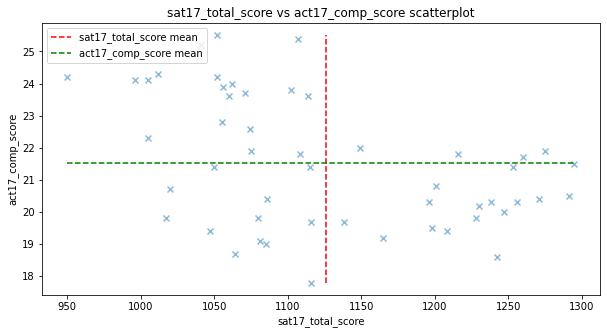

In [72]:
plot_scatter(final,'sat17_total_score', 'act17_comp_score')

The combined scores exhibit the same behaviour as above

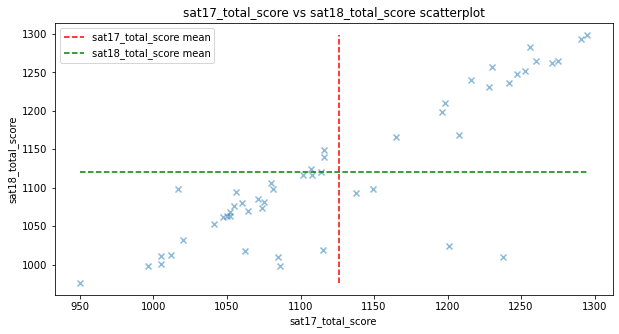

In [73]:
plot_scatter(final,'sat17_total_score', 'sat18_total_score')

These variables are positively correlated. When comparing SAT scores across both years, states that did well in 2017 tend to do well in 2018.

There seems to be 2 outliers. This implies a disproportionate change in average SAT scores across the years.

In [74]:
final.loc[(final['sat17_total_score'] > 1200) & (final['sat18_total_score'] < 1050),['state','sat17_part_rate','sat18_part_rate','sat17_total_score','sat18_total_score','act17_part_rate','act18_part_rate']]

state  sat17_part_rate  sat18_part_rate  sat17_total_score  \
5   Colorado             0.11             1.00               1201   
44      Utah             0.03             0.04               1238   

    sat18_total_score  act17_part_rate  act18_part_rate  
5                1025              1.0              0.3  
44               1010              1.0              1.0

1) Colorado

When zooming in on the 2 outlier states, we see that Colorado is undergoing a "transition period". In 2017 their participation rate in ACT was 100%, but in 2018 it is reduced to 30%. On the other hand SAT participation rate increased from 11% to 100%.

The implication of this change is that the underlying cohort's characteristics will be vastly different. I hypothesise that in 2017, the candidates for the SAT exams are proactively taking the examination for their university admissions purposes. This is because they will have had taken the ACT as well. These students who put more effort in their academics, will likely be academically stronger than the average person, hence the 2017 SAT cohort in Colorado was able to get a better SAT result.

2) Utah

The average total score in Utah had a huge change. This however is likely due to the fact that the participation rate is very low, from 3% in 2017 to 4% in 2018. This is an issue of a small sample, the characteristics of this small proportion of the graduate population may vary to a large extend.

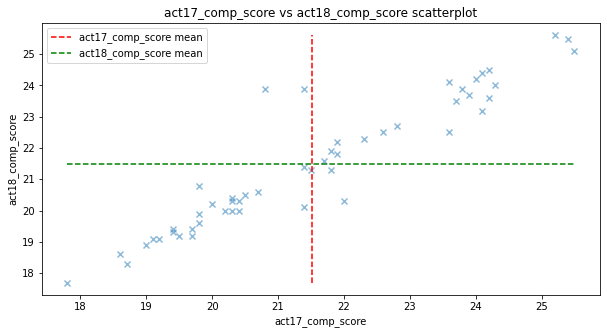

In [75]:
plot_scatter(final,'act17_comp_score', 'act18_comp_score')

Similarly, when looking at the combined ACT scores. We see that the scores are positively correlated across the years.

Once again, we will investigate the outliers

In [76]:
final.loc[(final['act17_comp_score'] < 22) & (final['act18_comp_score'] > 23),['state','act17_part_rate','act18_part_rate','act17_comp_score','act18_comp_score','sat17_part_rate','sat18_part_rate']]

state  act17_part_rate  act18_part_rate  act17_comp_score  \
5   Colorado             1.00             0.30              20.8   
13  Illinois             0.93             0.43              21.4   

    act18_comp_score  sat17_part_rate  sat18_part_rate  
5               23.9             0.11             1.00  
13              23.9             0.09             0.99

1) Colorado

As mentioned above, Colorado is likely going through a transition period - changing from the ACT to the SAT examination. Similar to what happen to SAT total results, the cohort in 2018 who are proactively taking the ACT examination will tend to do better than the cohort in 2017, where all students were participating in the exam.

2) Illinois

The same effect happened to Illinois.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

I will be plotting boxplots in the following groups
- ACT & SAT Participation rate [0,1]
- SAT test score [200,800]
- SAT total score [400,1600]
- ACT test [1,36]

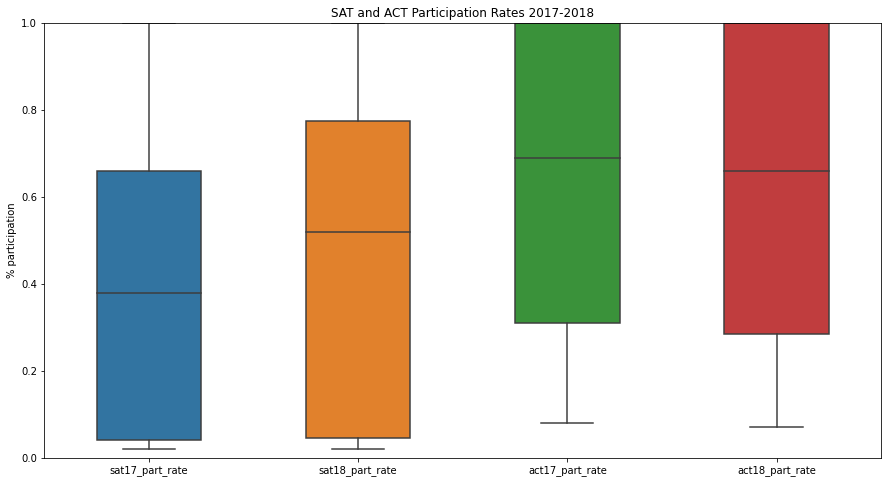

In [77]:
# Code
plt.figure(figsize=(15,8))
sns.boxplot(data=final[['sat17_part_rate','sat18_part_rate','act17_part_rate','act18_part_rate']],
            width= 0.5).set(ylim=(0,1),
                        ylabel='% participation',
                        title= "SAT and ACT Participation Rates 2017-2018");

This is a good visualisation comparing SAT with ACT. Its clear that the SAT is less popular than the ACT in 2017. However, the data hints that the SAT participation rate is increasing, while the ACT is decreasing.

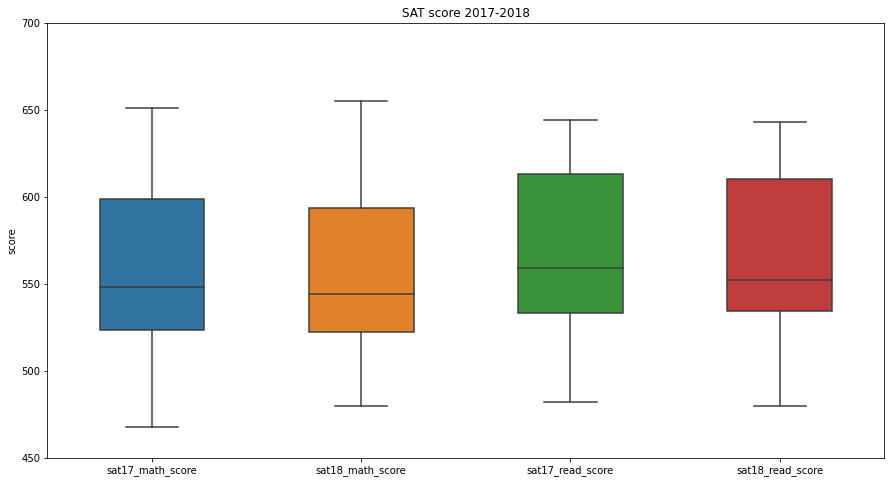

In [78]:
# Code
plt.figure(figsize=(15,8))
sns.boxplot(data=final[['sat17_math_score','sat18_math_score','sat17_read_score','sat18_read_score']],
            width= 0.5).set(ylim=(450,700),
                        ylabel='score',
                        title= "SAT score 2017-2018");

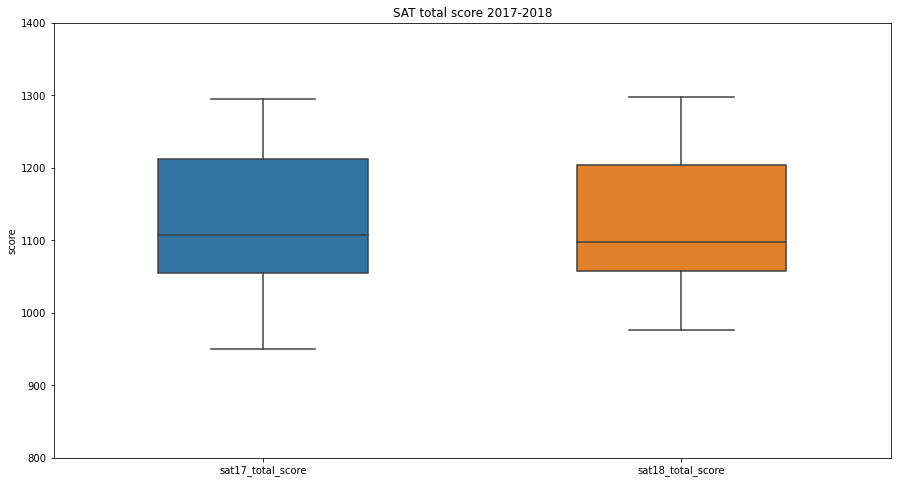

In [79]:
# Code
plt.figure(figsize=(15,8))
sns.boxplot(data=final[['sat17_total_score','sat18_total_score']],
            width= 0.5).set(ylim=(800, 1400),
                        ylabel='score',
                        title= "SAT total score 2017-2018");

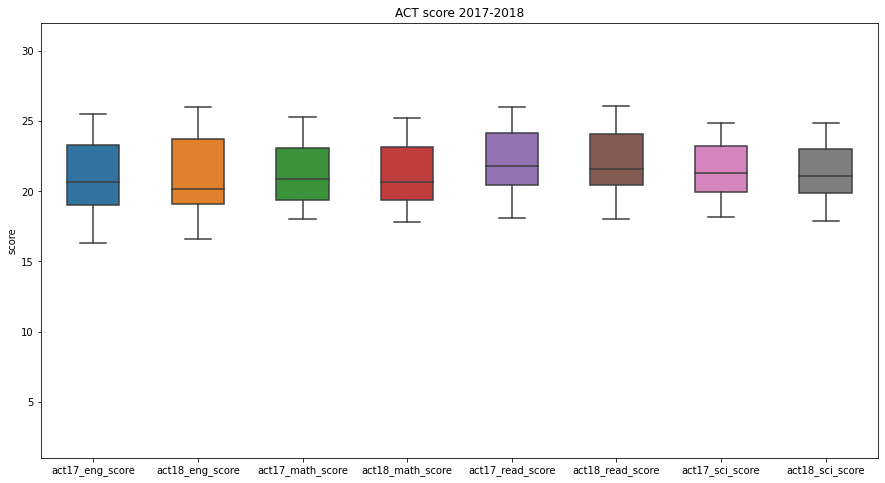

In [80]:
# Code
plt.figure(figsize=(15,8))
sns.boxplot(data=final[['act17_eng_score', 'act18_eng_score', 'act17_math_score', 'act18_math_score', 'act17_read_score', 'act18_read_score', 'act17_sci_score', 'act18_sci_score']],
            width= 0.5).set(ylim=(1,32),
                        ylabel='score',
                        title= "ACT score 2017-2018");

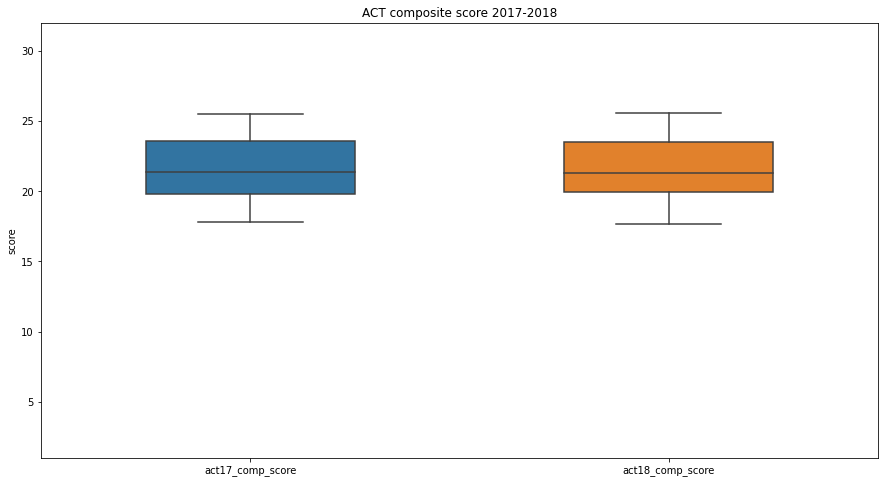

In [81]:
# Code
plt.figure(figsize=(15,8))
sns.boxplot(data=final[['act17_comp_score', 'act18_comp_score']],
            width= 0.5).set(ylim=(1,32),
                        ylabel='score',
                        title= "ACT composite score 2017-2018");



#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

We saw previously that some states experienced a huge decrease in their test scores when there was a change in participation rate. To further understand the relationship between participation rates and average test score. We plot a scatterplot between the participation rate of a given exam with the total/composite score of the exam.

As expected, we observe a negative relationship between participation rate and exam results. This supports the earlier observation, where low participation rate implies that the examination is optional. This optional participation is a signal that the student is hardworking or aiming for better universities, on average these students will do comparatively well academically.

Another implication of this relationship, is that average/ composite scores of a state does not imply that the state is performing better academically. We cannot look at scores in isolation but rather we have to control for the participation rate as it creates a form of selection bias.

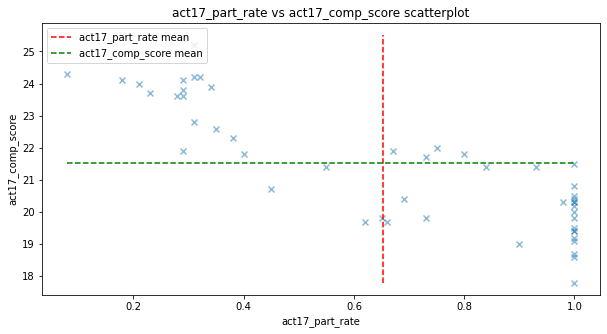

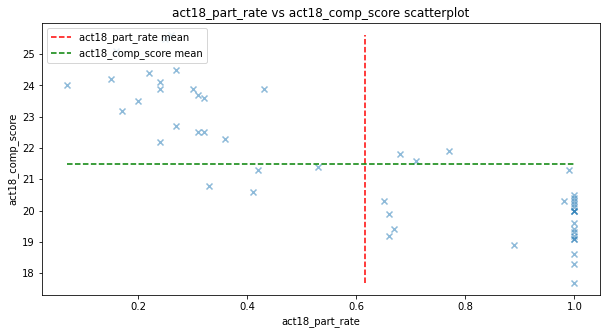

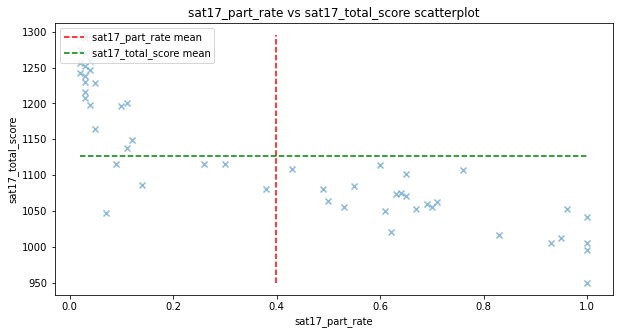

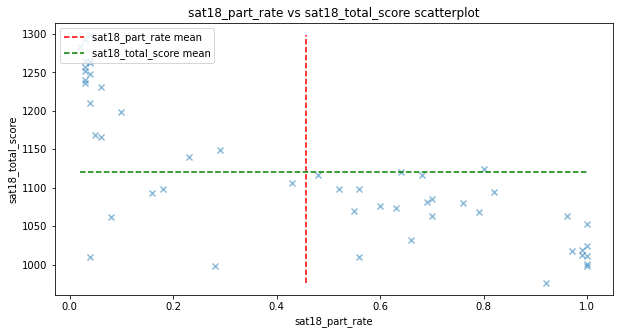

In [82]:
plot_scatter(final,'act17_part_rate','act17_comp_score')
plot_scatter(final,'act18_part_rate','act18_comp_score')
plot_scatter(final,'sat17_part_rate','sat17_total_score')
plot_scatter(final,'sat18_part_rate','sat18_total_score')

To better visualise this effect, we split the dataset into states with participation rates above the mean for the exam and below the mean. This will show a clear relationship, that states with higher participation rate will have lower average scores.

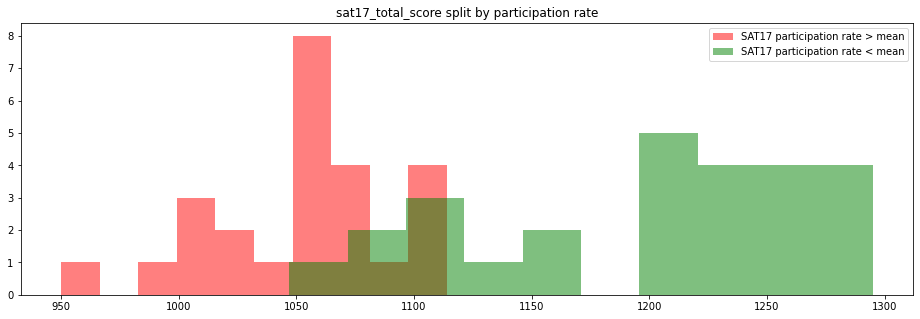

In [83]:
plt.figure(figsize = (16,5))
plt.hist(final.loc[(final["sat17_part_rate"] > final["sat17_part_rate"].mean()),'sat17_total_score'], color ="r", label = 'SAT17 participation rate > mean', stacked = True, alpha = 0.5)
plt.hist(final.loc[(final["sat17_part_rate"] < final["sat17_part_rate"].mean()),'sat17_total_score'], color ="g", label = "SAT17 participation rate < mean", stacked = True, alpha = 0.5)
plt.legend(loc = 'upper right')
plt.title("sat17_total_score split by participation rate");


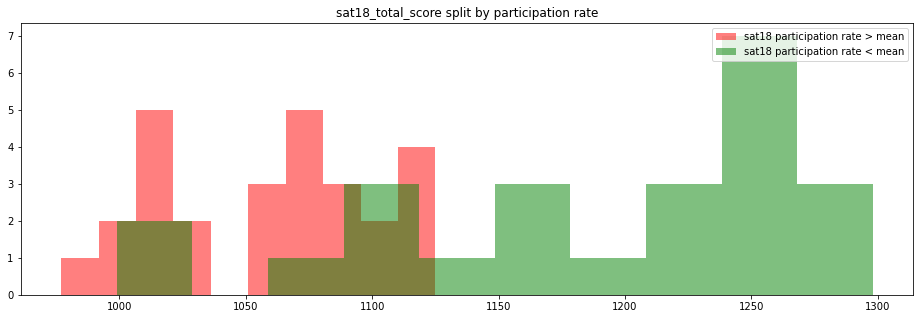

In [84]:
plt.figure(figsize = (16,5))
plt.hist(final.loc[(final["sat18_part_rate"] > final["sat18_part_rate"].mean()),'sat18_total_score'], color ="r", label = 'sat18 participation rate > mean', stacked = True, alpha = 0.5)
plt.hist(final.loc[(final["sat18_part_rate"] < final["sat18_part_rate"].mean()),'sat18_total_score'], color ="g", label = "sat18 participation rate < mean", stacked = True, alpha = 0.5)
plt.legend(loc = 'upper right')
plt.title("sat18_total_score split by participation rate");


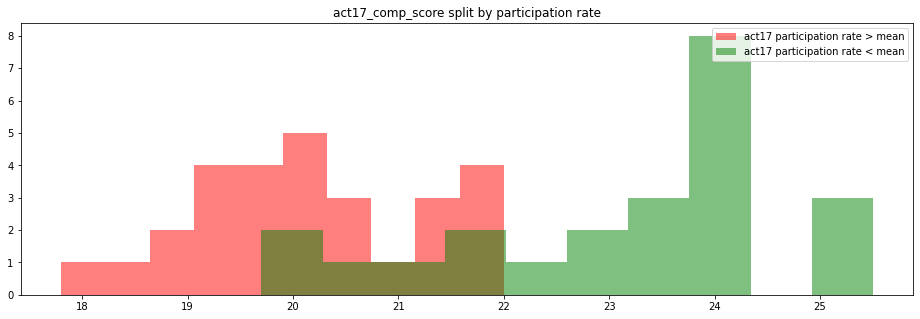

In [85]:
plt.figure(figsize = (16,5))
plt.hist(final.loc[(final["act17_part_rate"] > final["act17_part_rate"].mean()),'act17_comp_score'], color ="r", label = 'act17 participation rate > mean', stacked = True, alpha = 0.5)
plt.hist(final.loc[(final["act17_part_rate"] < final["act17_part_rate"].mean()),'act17_comp_score'], color ="g", label = "act17 participation rate < mean", stacked = True, alpha = 0.5)
plt.legend(loc = 'upper right')
plt.title("act17_comp_score split by participation rate");

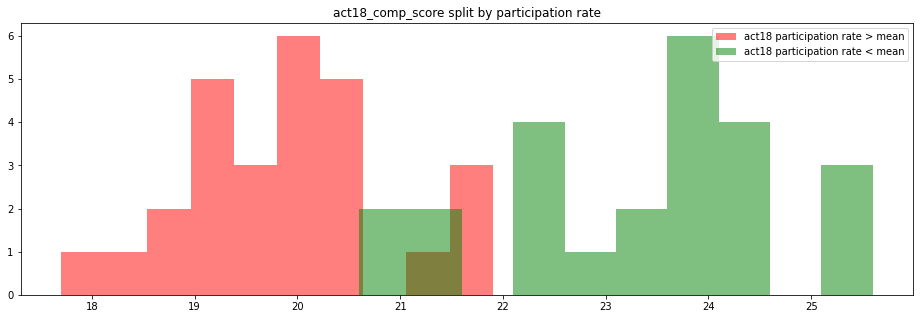

In [86]:
plt.figure(figsize = (16,5))
plt.hist(final.loc[(final["act18_part_rate"] > final["act18_part_rate"].mean()),'act18_comp_score'], color ="r", label = 'act18 participation rate > mean', stacked = True, alpha = 0.5)
plt.hist(final.loc[(final["act18_part_rate"] < final["act18_part_rate"].mean()),'act18_comp_score'], color ="g", label = "act18 participation rate < mean", stacked = True, alpha = 0.5)
plt.legend(loc = 'upper right')
plt.title("act18_comp_score split by participation rate");

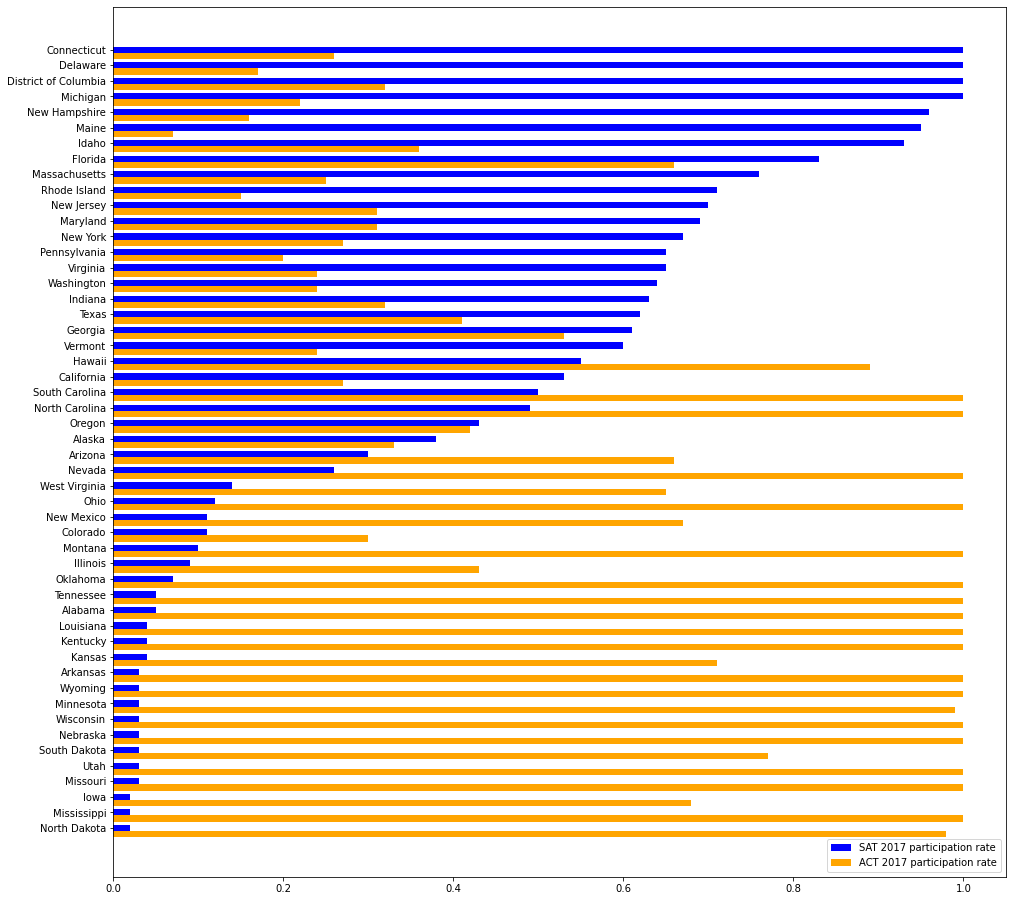

In [105]:
final_m = final.sort_values('sat17_part_rate', ascending = True)
plt.figure(figsize = (16,16))
w = 0.4


bar1 =  np.arange(len(final_m['state']))
bar2 =  [i - w for i in bar1]


plt.yticks(ticks = bar1, labels = final_m['state']);


plt.barh(y = bar1, width = final_m['sat17_part_rate'], label = 'SAT 2017 participation rate', height = w, color = 'blue')
plt.barh(y = bar2, width = final_m['act18_part_rate'], label = 'ACT 2017 participation rate', height = w, color = 'orange')

plt.legend(loc = "lower right")

plt.show()

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

The following are choropleth maps of participation rates for the 2 exams and the 2 years. It may be hard to view, but generally the darker the shade of the given state, the higher the participation rate.

Alaska and Hawaii are not included in the image, as they are geographically seperated from the other states and it will make the choropleth much harder to read.

The choropleth below hints that states with high participation in ACT will have low participation of SAT. The choropleth map almost looks inverted when comparing ACT to SAT participation rates. It also seems that coastal states prefer the SAT over the landlocked states.

To futher zoom into participation rates, it would be interesting to see which states have large changes in ACT/SAT participation rates. 2 choropleth maps were created with the percentage point change in the participation rates from 2017 to 2018. What we observe is that states which have big changes in participation rates in 1 exam will have the opposite effect on the other exam. It seems that states may opt to switch from the SAT to the ACT exams.

![ACT17](../images/ACT%2017.png)
![ACT18](../images/ACT%2018.png)
![SAT17](../images/SAT%2017.png)
![SAT18](../images/SAT%2018.png)
![Change in ACT](../images/Change%20in%20ACT.png)
![Change in SAT](../images/Change%20in%20SAT.png)

On a side note, the map looks alot like the 2016 election results, with Democrat states favouring SATs and Republican states favouring ACT. 

(Source: https://www.nytimes.com/elections/2016/results/president)

![election-results.jpg](../images/election-results.jpg)

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

For this exercise, we will be commenting on the following groups of data (see below). We have split the data based on their theoretical range for ease of reference as well as the fact that they share similar properties.

1) SAT individual scores 

2) SAT total scores

3) SAT/ACT Participation rate

4) ACT Scores

To better understand the underlying distribution, we will plot a histogram of the variables as well as calculate the mean, median, mode for central tendency, Standard deviation for spread and skew for shape.

In [87]:
# creating a function that generates a histogram of a list of variables

def subplot_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16,8), sharex = True, sharey = True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_columns[i])   # Set titles, labels, etc here for each subplot
        ax[i].axvline(np.mean(dataframe[column]), linestyle = "-.", color = "Red")

1) SAT individual scores

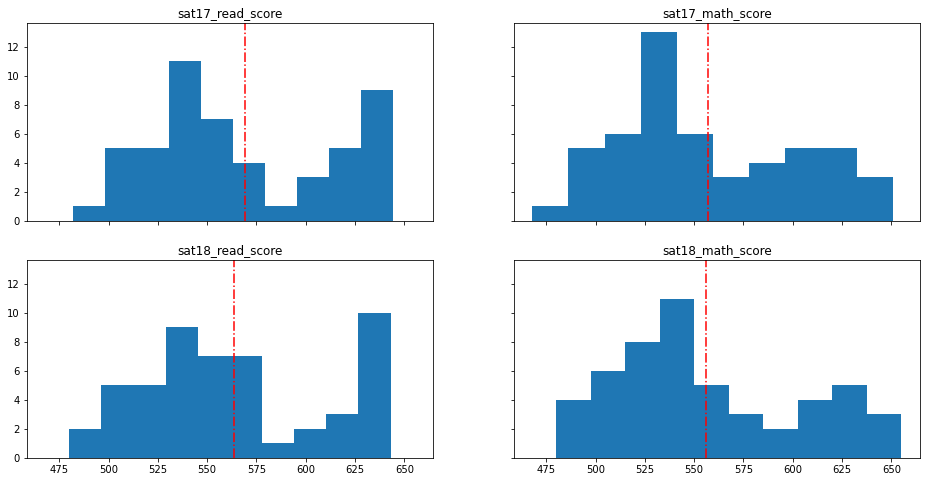

In [88]:
list_of_columns = ['sat17_read_score', 'sat17_math_score', 'sat18_read_score', 'sat18_math_score']

subplot_histograms(final, list_of_columns);

In [89]:
final[list_of_columns].agg(['mean', 'std', 'skew']).T

mean        std      skew
sat17_read_score  569.117647  45.666901  0.272693
sat17_math_score  556.882353  47.121395  0.365040
sat18_read_score  563.686275  47.502627  0.282300
sat18_math_score  556.235294  47.772623  0.530407

The mean, standard deviation and skew of the variables are presented in the table above.

SAT reading scores appear to be bimodally distributed, while the Math score have a single peak at the mid 500 mark.

All the variables are positively skewed. A way to interpret the skew of the distribution is that there are more states with average scores is below the mean. This is also evident with the bimodal distribution observed, there are a few states that are performing significantly better than others.



2) SAT total scores

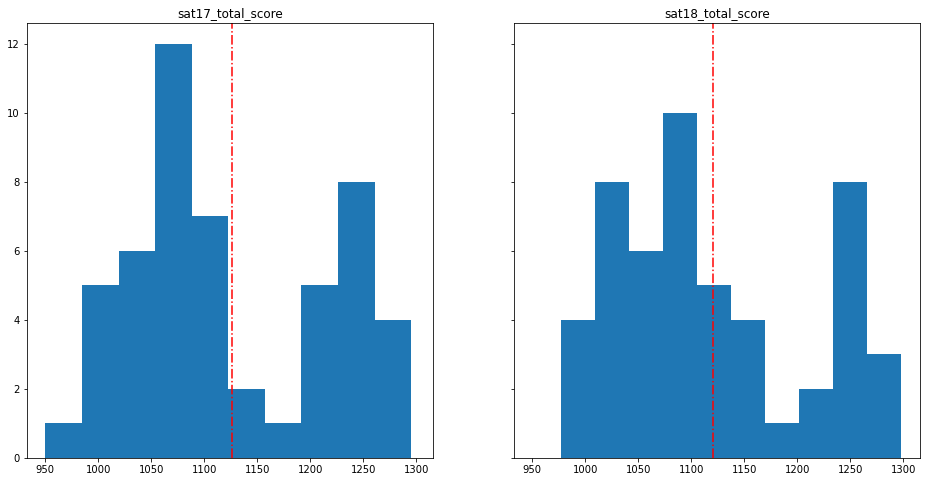

In [90]:
list_of_columns = ['sat17_total_score', 'sat18_total_score']


subplot_histograms(final, list_of_columns);

In [91]:
final[list_of_columns].agg(['mean', 'std', 'skew']).T

mean        std      skew
sat17_total_score  1126.098039  92.494812  0.310903
sat18_total_score  1120.019608  94.155083  0.466432

The mean, standard deviation and skew of the variables are presented in the table above.

SAT Total Score appear to be bimodally distributed with a positive skew.


3) SAT/ACT Participation Rate

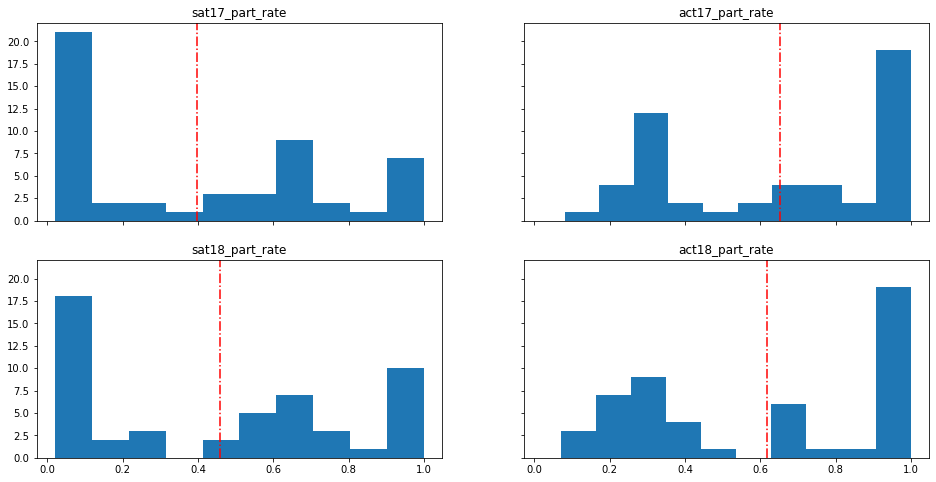

In [92]:
list_of_columns = ['sat17_part_rate', 'act17_part_rate', 'sat18_part_rate', 'act18_part_rate']

subplot_histograms(final, list_of_columns);

In [93]:
final[list_of_columns].agg(['mean', 'std', 'skew']).T

mean       std      skew
sat17_part_rate  0.398039  0.352766  0.346450
act17_part_rate  0.652549  0.321408 -0.197989
sat18_part_rate  0.457451  0.373143  0.136228
act18_part_rate  0.616471  0.340810 -0.021916

The mean, standard deviation and skew of the variables are presented in the table above.

ACT and SAT participation rate appear to be bimodally distributed. This bimodal quality is more pronounced in SAT participation, with many states having very low participation and others with full participation.





4) ACT Scores

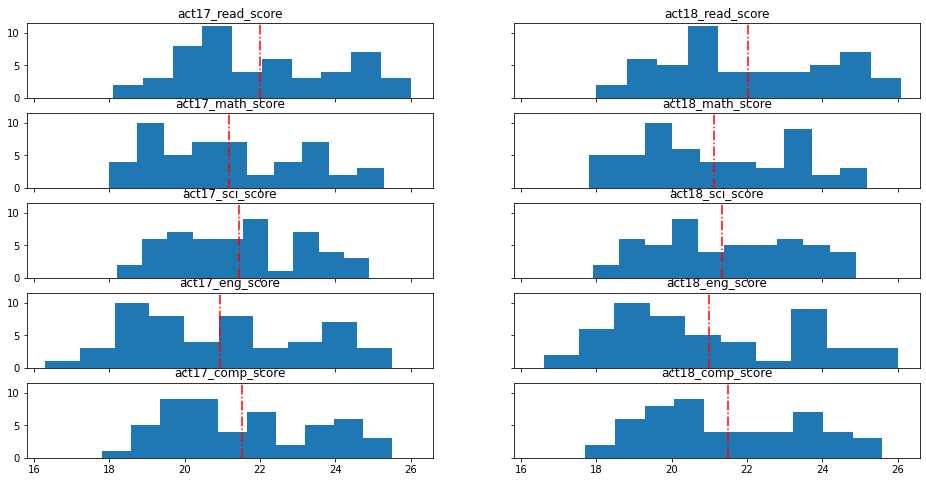

In [94]:
list_of_columns = ['act17_read_score', 'act18_read_score', 'act17_math_score', 'act18_math_score', 'act17_sci_score', 'act18_sci_score' ,'act17_eng_score', 'act18_eng_score' ,'act17_comp_score', 'act18_comp_score']

subplot_histograms(final, list_of_columns);

In [95]:
final[list_of_columns].agg(['mean', 'std', 'skew']).T

mean       std      skew
act17_read_score  22.013725  2.067271  0.269366
act18_read_score  22.015686  2.167245  0.201361
act17_math_score  21.182353  1.981989  0.332683
act18_math_score  21.125490  2.035765  0.269548
act17_sci_score   21.450980  1.739353  0.218823
act18_sci_score   21.345098  1.870114  0.172383
act17_eng_score   20.931373  2.353677  0.352660
act18_eng_score   20.988235  2.446356  0.371507
act17_comp_score  21.519608  2.020695  0.319810
act18_comp_score  21.486275  2.106278  0.281962

The mean, standard deviation and skew of the variables are presented in the table above.


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:
We do not observe this trend in the dataset provided. 

A variable may not be normally distributed if there are factors in place that affect the variable. For example, we typically see a bimodal distribution for participation rates. In a world where an individual can freely decide whether to participate in the SAT/ACT, we may see a normally distributed participation rate across states. However in reality, a student's decision to particpate in the SAT/ACT examination is dependent on the state's policy towards education. For example in 2017, Colorado made the SAT mandatory (link: https://www.testive.com/colorado-sat-change-2017/). It is for this reason that not all variables will be normally distributed.




Side note: If the question is asking why does Central Limit Theorem not apply for the data set provided: 

1) CLT states that given a large sample size, the sampling distribution of the MEAN will be approximately a normal distribution.

2) Despite having 51 samples (1 for each state) of mean scores, these samples are of different populations with different conditions. As explained above, a state may have different practices compared to other states.


Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

Math scores and reading scores could be normally distributed based on the observations in the histogram plots.

Participation is not normally distributed


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

Yes and no.

We can use SAT and ACT particpation rates to infer information of the state's population. This is because participation rate is the (# of students taking the exam that year) / (# of students that year). Since the same base is considered, the 2 participation rate can be used for statistical inference of the particular state.

We however cannot use SAT and ACT participation rates to infer information on the country's population. This is because, the participation rate data are aggregated on the state level. Without knowing the student population of a given country, we must be careful when using SAT and ACT for statistical inference on the country level. The problem of using 51 aggregated values is that the participation rates are equally weighted. A state with a small population like Wyoming participation rate will be considered as much as a large population state like Texas.


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: 
This depends on what information of the population we are studying. If we are comparing the math ability across states, we cannot compare SAT scores to ACT scores.

1) Different population

We saw previously that participation rate have an effect on the average exam scores. Because of this effect, we cannot use SAT math scores to compare with ACT math scores as there are differnet populations with different participation rates taking the exam.

2) Different exam

Even if we try to control for the different population, for example Florida has a very high participation for the SAT and ACT exams, the exams are still different.

The SAT possible scores is 200 - 800, the ACT possible scores is 1 - 36. Even if we normalise the data, we cannot compare the 2 exams. Florida 2017 normalised SAT math score is 49%, the normalised ACT math score is 53%.


In [96]:
final.loc[(final['state'] == 'Florida'),['sat17_part_rate', 'sat17_math_score', 'act17_part_rate', 'act17_math_score']]

sat17_part_rate  sat17_math_score  act17_part_rate  act17_math_score
9             0.83               497             0.73              19.4

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [97]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

We plot a scatterplot between SAT 2017 participation rates and ACT 2017 participation rates to find any trends between the 2 variables. We already know that the participation rates are negatively correlated, what is interesting of the scatter plot is that the bottom left quadrant is empty. This means that there are only states with:

- High participation in ACT and low participation in SAT

- High participation in ACT and high participation in SAT

- Low participation in ACT and high participation in SAT


This is reassuring as most high school student will have a pathway to college.

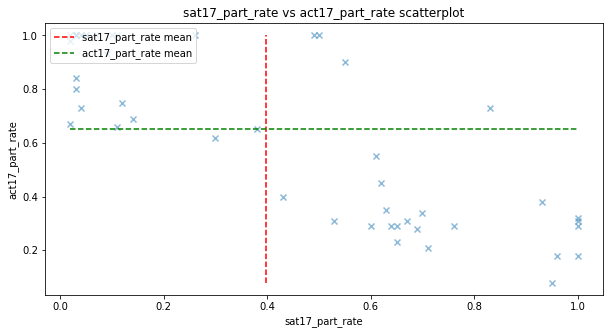

In [98]:
plot_scatter(final,'sat17_part_rate','act17_part_rate')

Taking a look at a horizontal bar plot (sorted by SAT 2017 participation rates) of SAT participation rate for 2017/2018, we can see 3 types of states.

1) States with very high SAT participation

These are states like Conneticut, Delaware, District of Columbia. States near the top of the of the bar plot. These states made it mandatory to take the SAT in 2017:

- Colorado
- Connecticut
- Delaware
- District of Columbia
- Idaho
- Illinois
- Maine
- Michigan
- New Hampshire
- Ohio
- Tennessee

(Source: https://www.testive.com/state-sat-act/)

2) States with an increasing participation in SAT

These are states in the middle of the bar plot, many of them are showing increasing participation in the SATs. For example, Rhode Island, New Jersey, Maryland.

Most notable in this group are Colorado and Illonois, where SAT participation increased to 100%. These are states which made the SAT's mandatory for the 2018 exam (Source: https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/)

SAT revised their syllabus in the 2017 exam, many states especially in this group observed an increase in participation rates. This hints that the revised syllabus is well recieved.

SAT also started SAT School Day in 2009 with an increase rollout to more schools(Source: https://collegereadiness.collegeboard.org/sat/k12-educators/sat-school-day/about). This improves the SAT's accessability for students by allowing them to take the exam on a school day in school instead of the typical set up on the weekend in a test centre. Students who previously faced difficulties with transport or who have to work on the weekends will benefit from SAT School Day. This trend of increasing participation is shown in the bar chart in this group of states.


3) States with very low SAT participation

These are states like North Dakota and Mississippi. States at the bottom of the bar plot. These states all have a very high participation in the ACT exams. In fact many of these states make it mandatory to take the ACT. I
n 2017 it was mandatory for students to take the ACT in: 
- Alabama
- Hawaii
- Idaho
- Kentucky
- Louisiana
- Mississippi
- Missouri
- Montana
- Nebraska
- Nevada
- North Carolina
- North Dakota
- Ohio
- South Carolina
- Tennessee
- Utah
- Wisconsin
- Wyoming

(Source: https://www.testive.com/state-sat-act/)

It is important to note that some states have mutli-year contracts to exclusively administer one of college admissions test which College Board and ACT have to competitively bid for.
(Source: https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html). This will affect our strategy when selecting states to target to increase SAT participation.

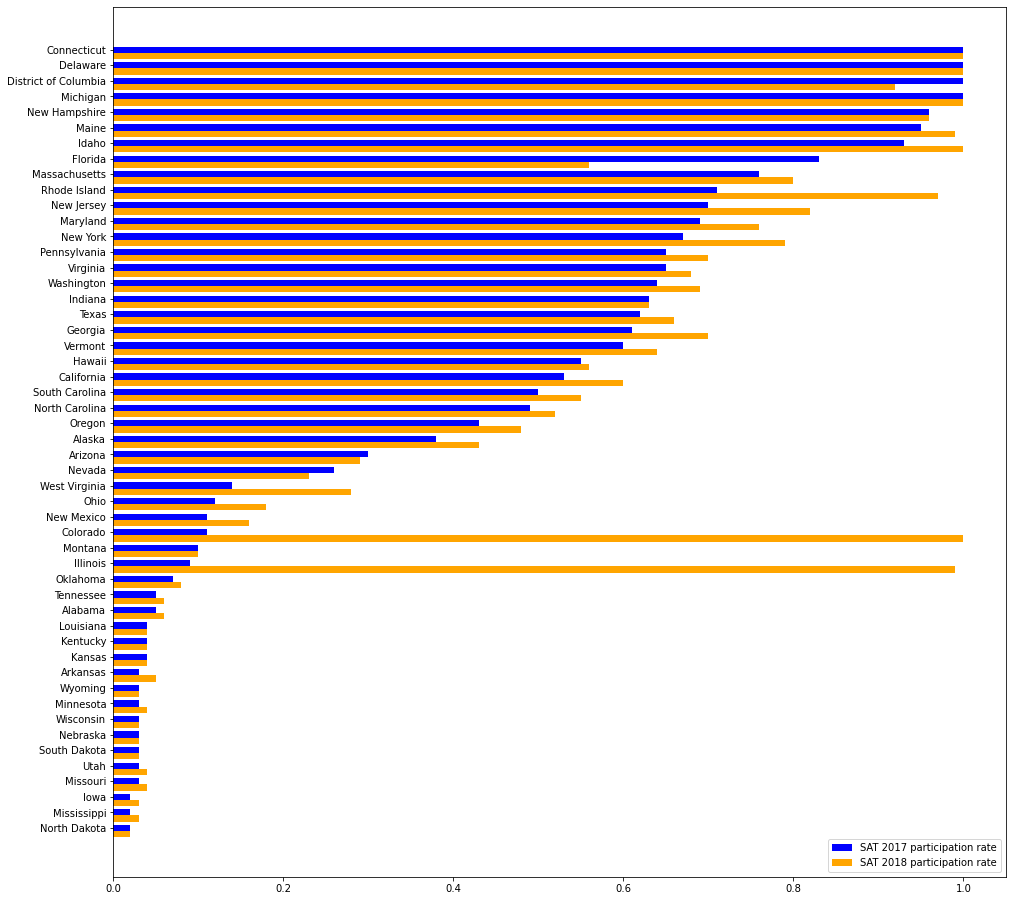

In [99]:
final_m = final.sort_values('sat17_part_rate', ascending = True)
plt.figure(figsize = (16,16))
w = 0.4


bar1 =  np.arange(len(final_m['state']))
bar2 =  [i - w for i in bar1]


plt.yticks(ticks = bar1, labels = final_m['state']);


plt.barh(y = bar1, width = final_m['sat17_part_rate'], label = 'SAT 2017 participation rate', height = w, color = 'blue')
plt.barh(y = bar2, width = final_m['sat18_part_rate'], label = 'SAT 2018 participation rate', height = w, color = 'orange')

plt.legend(loc = "lower right")

plt.show()

3 states that show increasing trends in SAT participation rates.

|State|2017 SAT participation rate|2018 SAT participation rate|Remarks|Source
|---|---|---|---|---|
|Colorado|11%|100%|Colorado made the SAT mandatory for all students|https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/|
|Rhode Island|71%|97%| In 2018, the SATs and PSATs became a graduation requirement, part of the stateâ€™s federal education plan. Rhode Island is also one of 10 states, including Maine and New Hampshire, that give the SAT to students for free.| https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores|
|West Virginia|14%|28%| The West Virginia Department of Education has chosen the SAT as the new statewide standardized test to replace the Smarter Balanced exam for high school juniors this spring. The SAT will also be offered to public schools for free|https://www.wvgazettemail.com/news/education/wv-chooses-sat-as-new-high-school-standardized-test-for-juniors/article_b60d2618-4943-56f6-b180-4b4442172ef8.html|



## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

We return to the problem statement at hand: Which states in the US should College Board target to increase the national participation rate of the SAT?

To address this the problem, we segmentise the states into 3 categories. We will be using 2018 participation rates so as to propose actions from 2019 onwards. The states will be segmented based on the ACT or SAT participation rates, we will be treating. Group 1 will have SAT participation > 80%, group 2 will have ACT participation > 80% and group 3 will have neither tests participation rate >80%. For each of the group, there is a different strategy to increase/ maintain participation rate in a sensible and economical way.

1) States with very high (>80%) to full SAT participation rates - there is little room for any increase in SAT participation in these states. Typically these states already mandate it for students to take the SAT test to graduate. CollegeBoard should maintain the current approach with these states, revamping the syllabus when needed and providing accessability to students in need so as to not lose its current standing to the ACT.


![SAT18](../images/SAT%2018.png)

The following list is the list of states that fall in this catagory

In [100]:
final[final['sat18_part_rate'] > 0.8]['state']

5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
12                   Idaho
13                Illinois
19                   Maine
22                Michigan
29           New Hampshire
30              New Jersey
39            Rhode Island
Name: state, dtype: object

2) States with very high (>80%) to full ACT participation rates - These states typically have multi-year contracts signed with ACT. While it is possible to raise participation rates in these countries, one could argue that it is not economical as students who see the value in SAT to boost their college admission chances will opt to take the SATs, further expansion is unlikely. College Board should take note when the contracts are up for bidding to regain market share. We have seen this happen in Colorado, Illonois and Rhode Island to name a few.


![ACT18](../images/ACT%2018.png)

The following list is the list of states that fall in this catagory

In [101]:
final[final['act18_part_rate'] > 0.8]['state']

0            Alabama
3           Arkansas
11            Hawaii
17          Kentucky
18         Louisiana
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
33    North Carolina
34      North Dakota
35              Ohio
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

3) States with neither a high SAT nor high ACT participation rate - these are state that typically do not have contracts with either College Board or the ACT. This is the prime segment to target to increase SAT participation rates. We can see this segment in the bottom left quadrant in the scatter plot below.


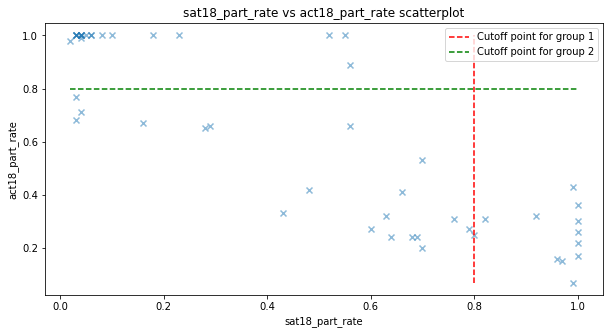

In [106]:
def plot_scatter(dataframe,var1,var2):
    #Aesthetics
    plt.figure(figsize = (10,5))
    plt.title(f'{var1} vs {var2} scatterplot')
    plt.xlabel(var1)
    plt.ylabel(var2)
    
    #Plot scatterplot
    
    plt.scatter(dataframe[var1],dataframe[var2], alpha = 0.5, marker='x')
    
    #Plot mean line
    
    plt.plot([0.8 for _ in range(len(final[var2]))],
             final[var2].sort_values(), label = 'Cutoff point for group 1',  linestyle='--', color = "red")
    
    plt.plot(final[var1].sort_values(), 
             [0.8 for _ in range(len(final[var1]))], label = 'Cutoff point for group 2',  linestyle='--', color = "green")
    
    plt.legend(loc = 'upper right')

plot_scatter(final,'sat18_part_rate','act18_part_rate')

The following list is the list of states that fall in this catagory

In [103]:
final[(final['act18_part_rate'] < 0.8) & (final['sat18_part_rate'] < 0.8)]['state']

1            Alaska
2           Arizona
4        California
9           Florida
10          Georgia
14          Indiana
15             Iowa
16           Kansas
20         Maryland
31       New Mexico
32         New York
37           Oregon
38     Pennsylvania
41     South Dakota
43            Texas
45          Vermont
46         Virginia
47       Washington
48    West Virginia
Name: state, dtype: object

Some states in this groups have very low admissions test participation rate. These are the states where expansion efforts will receive the most returns. See Oregon and Alaska for example:

In [104]:
final.loc[(final['act18_part_rate'] < 0.5) & (final['sat18_part_rate'] < 0.5),['state','act18_part_rate','sat18_part_rate']]

state  act18_part_rate  sat18_part_rate
1   Alaska             0.33             0.43
37  Oregon             0.42             0.48

In conclusion, College Board should focus their efforts to the states listed above in group 3 where ACT and SAT participation rates are < 80%. These are states that are likely not to have a contractual obligations to administer either the ACT or SAT to all students, hence they are the states which will provide greater returns on expansion efforts.

We recognise College Boards efforts to improve student accessibility, by revising the syllabus, with SAT School Day and free online tutoring with Khan Academy (Source: https://collegereadiness.collegeboard.org/sat?navId=pages-sat). This combined with making deals with schools and state education boards will help SAT improve its participation rate.

To add on to this, research has been done on what are the best practices to increase SAT participation.

1) Fee waivers

2) Offer SAT during school hours

3) Increase awareness of college accessibility

4) Establish "college going culture"

(Source: https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf)